# Import necessary libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('EcommerceCustomers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.shape

(500, 8)

In [6]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploratory Data Analysis

In [60]:
df.corr().style.background_gradient(cmap='viridis') # coolwarm could be used for colors

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [10]:
sns.set_style('white') ## it is used to give seaborn different style

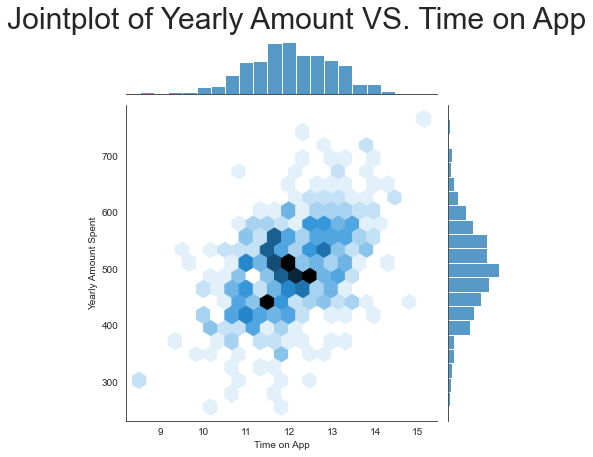

In [24]:
g = sns.jointplot(x='Time on App',
                  y='Yearly Amount Spent',
                  data=df,
                  kind='hex')

g.fig.suptitle('Jointplot of Yearly Amount VS. Time on App', y=1.05, fontsize=30)
plt.show()

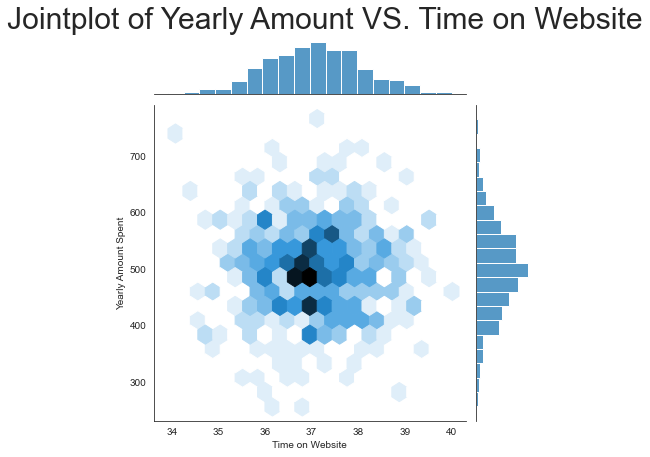

In [18]:
g = sns.jointplot(x='Time on Website',
                  y='Yearly Amount Spent',
                  data=df,
                  kind='hex')

g.fig.suptitle('Jointplot of Yearly Amount VS. Time on Website', y=1.05, fontsize=30)
plt.show()

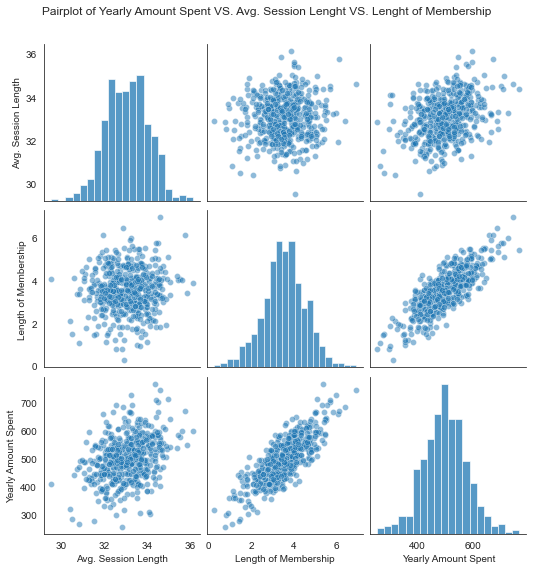

In [26]:
sub_df = df[['Avg. Session Length', 'Length of Membership', 'Yearly Amount Spent']]

g = sns.pairplot(sub_df,
                 kind='scatter',
                 plot_kws={'alpha':0.5})

g.fig.suptitle('Pairplot of Yearly Amount Spent VS. Avg. Session Lenght VS. Lenght of Membership', y=1.05)
plt.show()

### Illustrating Linear Regression

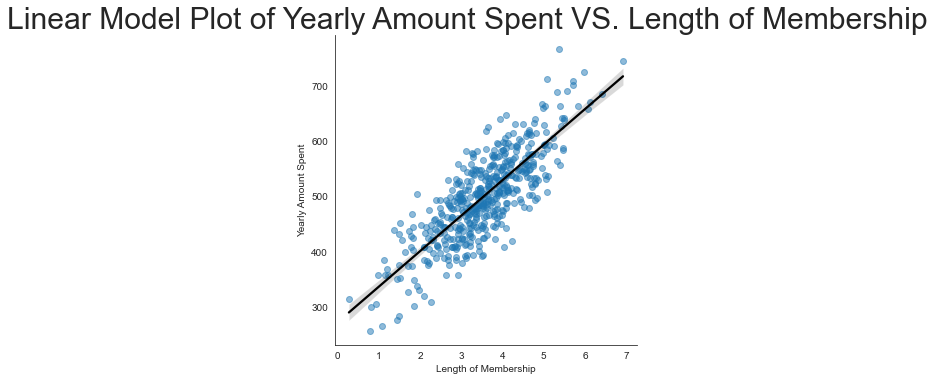

In [32]:
g = sns.lmplot(x='Length of Membership',
               y='Yearly Amount Spent',
               data=df,
               scatter_kws={'alpha':.5}, 
               line_kws={'color': 'black'})

g.fig.suptitle('Linear Model Plot of Yearly Amount Spent VS. Length of Membership', y=1.05, fontsize=30)

plt.show()

## Split data using Scikit-learn

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [39]:
y = df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [41]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
141,31.851253,12.418962,35.977652,3.251742
383,34.188184,13.130022,35.429334,3.790552
135,33.358398,12.703688,36.100914,2.724108
493,32.060914,12.625433,35.539142,5.412358
122,33.268330,11.113330,37.387946,4.018727
...,...,...,...,...
323,32.762456,10.952353,37.646292,4.019470
192,33.694898,11.202670,35.493964,4.015987
117,33.059264,11.725910,35.999099,5.004821
47,32.726785,12.988510,36.462003,4.113226


In [42]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
90,32.491447,12.530357,37.875219,2.476139
254,32.711119,12.326291,36.673878,3.350279
283,33.077731,11.466984,35.675728,1.809230
445,32.212924,11.732991,35.633954,4.331863
461,32.770492,11.371767,35.261498,4.034386
...,...,...,...,...
4,33.330673,12.795189,37.536653,4.446308
318,33.531860,13.665770,36.900221,3.515688
331,32.274594,12.954811,37.108816,3.689917
245,32.980029,11.201160,37.689337,2.412831


### Train the Model

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Interpreting Coeffiecient

In [45]:
lm.coef_

array([ 2.57675297e+01,  3.88003936e+01, -1.80409231e-02,  6.18525679e+01])

In [53]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
coef_df

,Coefficients
Avg. Session Length,25.767530
Time on App,38.800394
Time on Website,-0.018041
Length of Membership,61.852568


## Make Predictions

In [55]:
predictions = lm.predict(X_test)
predictions

array([438.05361824, 489.88569198, 370.69103491, 514.760391  ,
       496.7189217 , 451.55278137, 457.78867583, 336.67939991,
       527.81474016, 663.59455653, 559.9744863 , 526.04623292,
       551.99421026, 456.63948791, 450.23568445, 432.06183962,
       563.23217826, 408.88887454, 599.34396339, 486.90344586,
       715.98855998, 496.94092608, 411.57431473, 555.98451537,
       550.67872493, 398.39939771, 420.89896272, 395.80398185,
       548.01986143, 463.57065873, 558.50166416, 505.04153589,
       505.69744364, 463.9745016 , 425.90773104, 400.61232527,
       503.64365781, 430.32931831, 570.24273703, 422.00772918,
       487.84508367, 602.03000651, 615.86576796, 589.22540325,
       449.89751618, 379.99185043, 558.51374868, 462.84914541,
       502.36523082, 401.25888527, 524.46131262, 416.58817719,
       576.56973214, 477.79844616, 456.89273381, 398.0612513 ,
       564.95710004, 305.11202178, 562.18988371, 477.14131612,
       498.70567984, 434.25965119, 464.87939435, 577.22

## Graphical Evaluation of the Model

### Analytical Evaluation of the Model

In [58]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [59]:
print('Mean Absolute Error:', mae(y_test, predictions))
print('Mean Squared Error:', mse(y_test, predictions))
print('Root Mean Squared Error:', mse(y_test, predictions, squared=False))
print('R-squared:', r2_score(y_test, predictions))

Mean Absolute Error: 7.851377170861448
Mean Squared Error: 94.55779479273275
Root Mean Squared Error: 9.72408323662096
R-squared: 0.9849262667370623
